In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
start_time = pd.datetime.now()

In [24]:
import pandas as pd
data=pd.read_csv('03_2010_df_625 Variables.csv')

In [25]:
data[data.Date<'2012-01-01'].shape

(35064, 625)

In [26]:
data = data.drop('Unnamed: 0',axis=1)

In [27]:
#Separating catagorical and numerical columns
binary_cols=['holiday','Temp.51.7.','DayTime','NightTime']
other_cols=['Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day']
need_zscore   = [x for x in data.columns if x not in binary_cols+other_cols]

In [28]:
for col in need_zscore:
    data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)

In [29]:
box=pd.read_csv('04_Box_Cox_load.csv',index_col=False)

In [30]:
box=box.drop('Unnamed: 0',axis=1)

In [31]:
box.index=pd.Int64Index(box.index)

In [32]:
data.index=pd.Int64Index(data.index)

In [33]:
box_data=pd.merge(data, box, left_on=data.index,right_on=box.index,how='left')

In [34]:
box_data = box_data.drop('key_0',axis=1)

In [35]:
box_data[box_data['Date']>='2011-12-31']

,Date,Hour,Temperature,Load,month,weekday,Distance,TemperatureLag1,TemperatureLag2,TemperatureLag24,...,holiday.temp_mean_6_0.5,holiday.temp_mean_6_2,holiday.temp_mean_6_3,holiday.temp_mean_12_0.5,holiday.temp_mean_12_2,holiday.temp_mean_12_3,holiday.temp_mean_24_0.5,holiday.temp_mean_24_2,holiday.temp_mean_24_3,box
35040,2011-12-31,1,-0.732274,-0.720468,December,Saturday,-0.056790,-0.797231,-0.683562,-0.862755,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.788346
35041,2011-12-31,2,-0.764484,-0.954374,December,Saturday,0.002644,-0.732321,-0.797277,-0.781736,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.282733
35042,2011-12-31,3,-0.813287,-1.113620,December,Saturday,0.092695,-0.764532,-0.732367,-0.732928,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.925719
35043,2011-12-31,4,-0.878684,-1.218058,December,Saturday,0.213365,-0.813336,-0.764578,-0.651421,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.685532
35044,2011-12-31,5,-0.959698,-1.249993,December,Saturday,0.362850,-0.878734,-0.813383,-0.635314,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.611087
35045,2011-12-31,6,-0.976291,-1.253446,December,Saturday,0.393468,-0.959749,-0.878782,-0.553807,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.603010
35046,2011-12-31,7,-1.008501,-1.142103,December,Saturday,0.452902,-0.976343,-0.959798,-0.553807,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.860702
35047,2011-12-31,8,-1.008501,-0.982425,December,Saturday,0.452902,-1.008554,-0.976392,-0.521106,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.220625
35048,2011-12-31,9,-0.894789,-0.903881,December,Saturday,0.243082,-1.008554,-1.008603,-0.472299,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.393714
35049,2011-12-31,10,-0.797182,-0.847347,December,Saturday,0.062978,-0.894840,-1.008603,-0.440086,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.516753


In [36]:
box_data.columns.values

array(['Date', 'Hour', 'Temperature', 'Load', 'month', 'weekday',
       'Distance', 'TemperatureLag1', 'TemperatureLag2',
       'TemperatureLag24', 'TemperatureLag48', 'Temperature_2_Lag',
       'Temperature_2_Lag1', 'Temperature_2_Lag2', 'Temperature_2_Lag24',
       'Temperature_2_Lag48', 'Temperature_3_Lag', 'Temperature_3_Lag1',
       'Temperature_3_Lag2', 'Temperature_3_Lag24', 'Temperature_3_Lag48',
       'Temperature_0.5_Lag', 'Temperature_0.5_Lag1',
       'Temperature_0.5_Lag2', 'Temperature_0.5_Lag24',
       'Temperature_0.5_Lag48', 'DistanceLag1', 'DistanceLag2',
       'DistanceLag24', 'DistanceLag48', 'Distance_2_Lag',
       'Distance_2_Lag1', 'Distance_2_Lag2', 'Distance_2_Lag24',
       'Distance_2_Lag48', 'Distance_3_Lag', 'Distance_3_Lag1',
       'Distance_3_Lag2', 'Distance_3_Lag24', 'Distance_3_Lag48',
       'Distance_0.5_Lag', 'Distance_0.5_Lag1', 'Distance_0.5_Lag2',
       'Distance_0.5_Lag24', 'Distance_0.5_Lag48', 'day', 'month.week',
       'quarter', 

In [37]:
box_data['Load_BoxCox']=box_data['box']

In [38]:
box_data = box_data.drop('box',axis=1)

In [39]:
sum(data.isnull().sum()>12)

225

In [40]:
box_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hour,43848.0,1.250000e+01,6.922265,1.000000,6.750000,12.500000,18.250000,24.000000
Temperature,43848.0,5.050669e-15,1.000011,-3.302266,-0.781077,0.032477,0.813333,2.472653
Load,35064.0,-8.043291e-17,1.000014,-1.905965,-0.723920,-0.081758,0.505596,5.227734
Distance,43848.0,1.140337e-14,1.000011,-1.557951,-0.807821,-0.087408,0.633005,4.685328
TemperatureLag1,43847.0,5.097445e-15,1.000011,-3.302356,-0.781126,0.032442,0.813311,2.472658
TemperatureLag2,43846.0,4.740394e-15,1.000011,-3.302439,-0.781172,0.032408,0.813289,2.472660
TemperatureLag24,43824.0,2.523695e-15,1.000011,-3.303109,-0.781736,0.031878,0.812791,2.472232
TemperatureLag48,43800.0,4.309602e-15,1.000011,-3.304656,-0.782658,0.031157,0.812264,2.472115
Temperature_2_Lag,43848.0,3.840123e-14,1.000011,-1.593788,-0.869323,-0.172500,0.752383,3.550547
Temperature_2_Lag1,43847.0,3.532064e-14,1.000011,-1.593834,-0.869362,-0.172533,0.752360,3.550550


In [41]:
train_set = box_data[box_data['Date']<'2011-01-01']
test_set = box_data[(box_data['Date']>='2011-01-01') & (box_data['Date']<'2012-01-01')]

In [42]:
train_set=train_set.dropna()

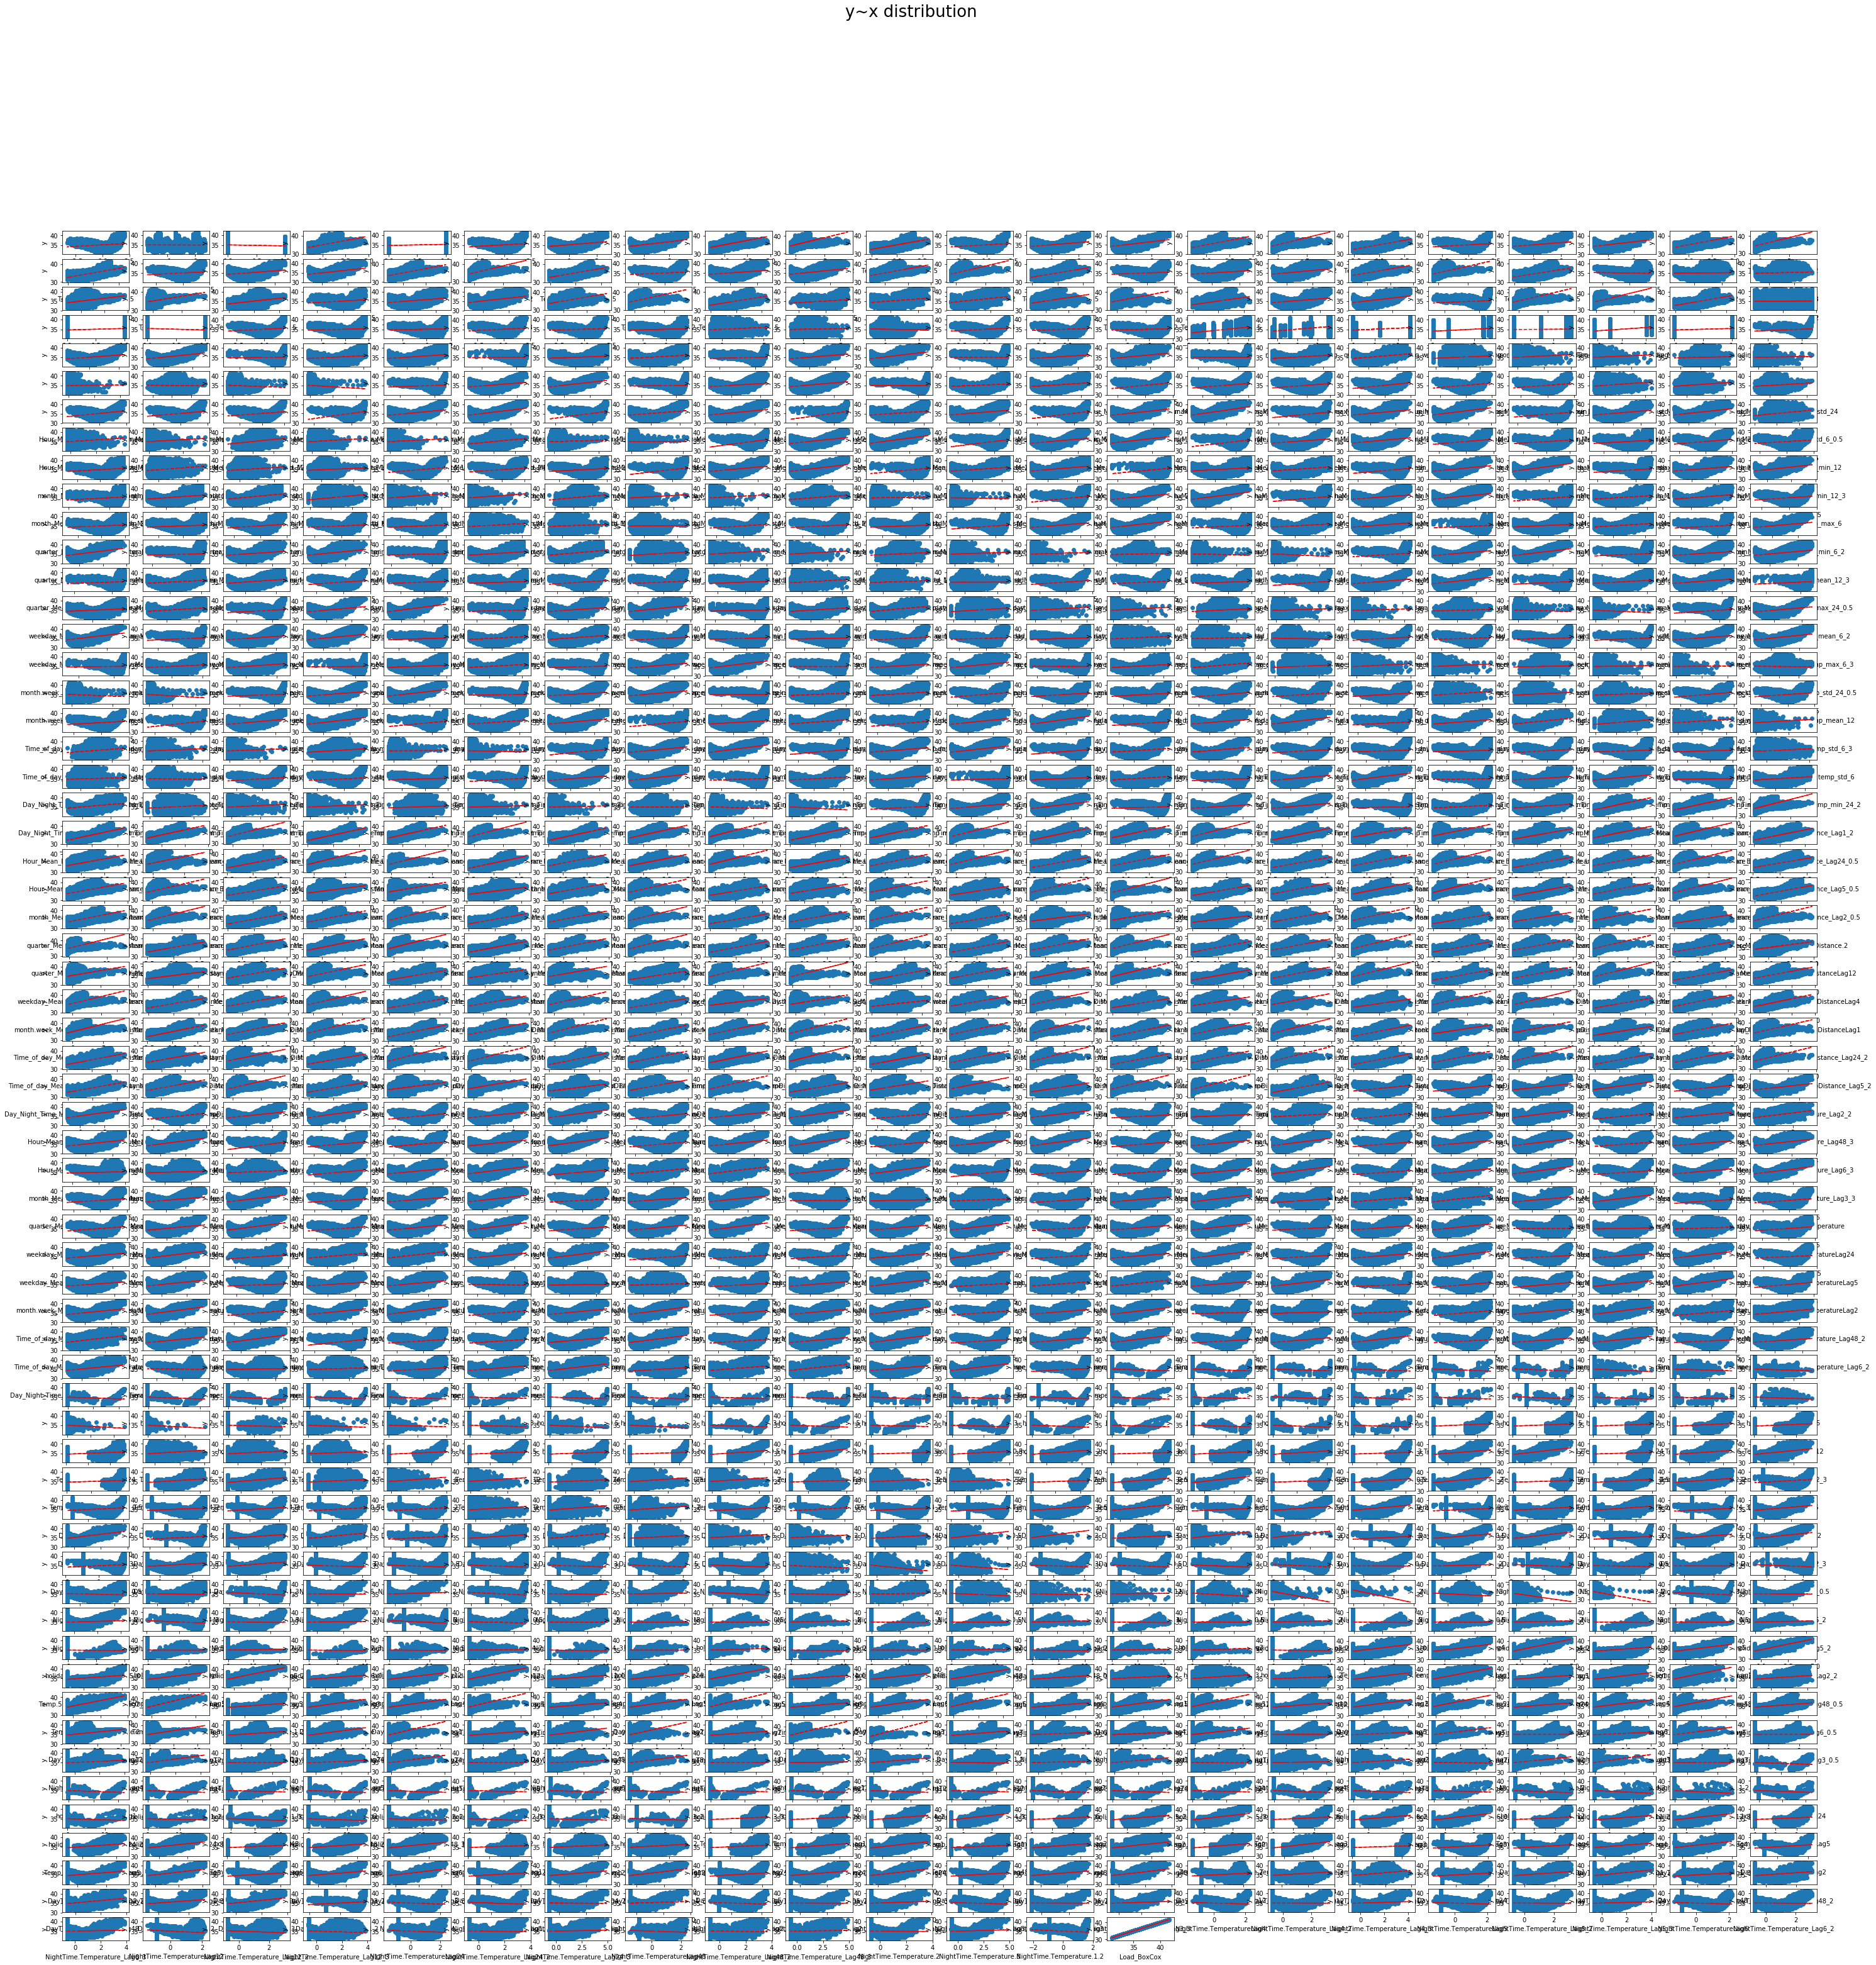

In [60]:
# plot x verses y for all x's if desired
fig=plt.figure(figsize=(50,50))
fig.suptitle('y~x distribution', fontsize=26)
for i,col in enumerate(tset.columns):
    z = np.polyfit(tset[col],tset['Load_BoxCox'],1)
    p = np.poly1d(z)
    ax=fig.add_subplot(61,22,i+1)
    ax.plot(train_set[col],p(tset[col]),"r--")
    ax.scatter(train_set[col],tset['Load_BoxCox'])
    ax.set_xlabel(col)
    ax.set_ylabel('y')
    
plt.show()

In [ ]:
# # look at correlation matrix if desired
# cormat = train_set.corr(method='pearson')
# cormat.style.background_gradient(cmap='pink_r').set_precision(2)

In [116]:
data_trntst=box_data[box_data['Date']<'2012-01-01'].drop(['Load','Date','Hour','month','weekday','quarter','month.week'],axis=1)

In [117]:
data_trntst = data_trntst.dropna()

In [118]:
X_trntst_save = data_trntst.drop(columns = 'Load_BoxCox').values
Y_trntst_save = data_trntst['Load_BoxCox'].values

In [119]:
# run PCA if desired
from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
pca = PCA(100)

pca.fit(X_trntst_save)
print(pca.n_components_)

X_trntst_save = pca.transform(X_trntst_save)

100


In [121]:
X_trntst_save

array([[ 3.47858261e+01,  2.50492395e+01, -3.32552774e+00, ...,
        -5.26659475e-02,  8.81189028e-03, -9.40699912e-02],
       [ 3.56528760e+01,  2.57155671e+01, -3.39318511e+00, ...,
        -4.82946631e-02,  4.81401953e-02, -6.61297866e-02],
       [ 3.63911207e+01,  2.62852787e+01, -3.45563543e+00, ...,
        -7.98975422e-02,  7.75936365e-02, -7.50960683e-02],
       ...,
       [ 1.07275189e+01, -6.89081481e+00, -3.44199737e-01, ...,
         2.70900060e-02, -6.18562787e-03,  8.29251841e-03],
       [ 1.10359824e+01, -6.66925021e+00, -3.66879765e-01, ...,
         2.39313628e-02, -2.05865634e-02,  1.11075471e-02],
       [ 1.16791222e+01, -6.23045772e+00, -4.12747623e-01, ...,
         1.69777273e-02, -2.80203580e-02,  1.38983085e-02]])

In [122]:
df_X_trntst_save=pd.DataFrame(X_trntst_save)

In [123]:
df_X_trntst_save

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,34.785826,25.049239,-3.325528,5.440644,5.608606,-4.456345,-1.635923,2.933856,4.580736,-2.074011,...,0.285537,-0.013551,0.025684,-0.110088,0.249934,-0.141508,-0.024770,-0.052666,0.008812,-0.094070
1,35.652876,25.715567,-3.393185,4.906188,6.382479,-4.320077,-1.665893,3.485860,4.901752,-2.519076,...,0.340618,0.020657,0.064390,-0.189506,0.289926,-0.136051,-0.024267,-0.048295,0.048140,-0.066130
2,36.391121,26.285279,-3.455635,4.273616,6.696560,-4.098784,-1.684727,4.113745,5.214964,-2.637435,...,0.389520,0.051113,0.104558,-0.230012,0.332602,-0.150125,0.061090,-0.079898,0.077594,-0.075096
3,37.346736,26.930657,-3.514030,3.480082,8.044204,-4.430974,-1.635875,4.480960,5.420618,-2.397431,...,0.407093,0.047263,0.077681,-0.221261,0.286341,-0.116921,0.006834,-0.037343,0.103915,-0.050440
4,37.895572,27.245868,-3.538348,3.103079,8.877786,-4.831382,-1.555791,4.765116,5.352198,-2.060276,...,0.408564,0.029082,0.084787,-0.177430,0.227082,-0.110242,-0.018594,-0.005900,0.105127,-0.063747
5,38.559684,28.141073,-3.630707,2.879157,8.929605,-4.964021,-1.517166,5.469139,5.674885,-1.544397,...,0.442988,0.026016,0.163569,-0.123824,0.167804,-0.128278,0.047519,0.000200,0.095421,-0.081248
6,39.365454,28.881325,-3.697175,2.509214,9.610506,-4.948565,-1.508804,5.583080,5.697628,-0.782004,...,0.269542,-0.061635,0.093233,-0.023637,0.056430,-0.103009,0.023767,0.018449,0.091152,-0.058632
7,39.636440,29.271116,-3.723097,2.382793,10.442888,-5.420792,-1.432229,5.287583,5.388308,0.266382,...,0.145607,-0.154242,0.041917,0.106248,-0.034537,-0.152706,0.013333,0.038924,0.072105,-0.160198
8,39.029170,28.228648,-3.608608,2.451753,9.807697,-5.724123,-1.267067,5.028417,4.416572,1.394760,...,0.246293,-0.096501,-0.062138,0.172829,-0.085530,-0.118618,-0.144074,0.101947,-0.029194,-0.210360
9,36.800305,24.972054,-3.270924,4.459760,6.216037,-6.730673,-0.875764,4.928233,2.270816,2.179792,...,0.364585,-0.028446,0.050741,0.199913,-0.169182,-0.078549,-0.070810,0.117872,-0.081590,-0.153117


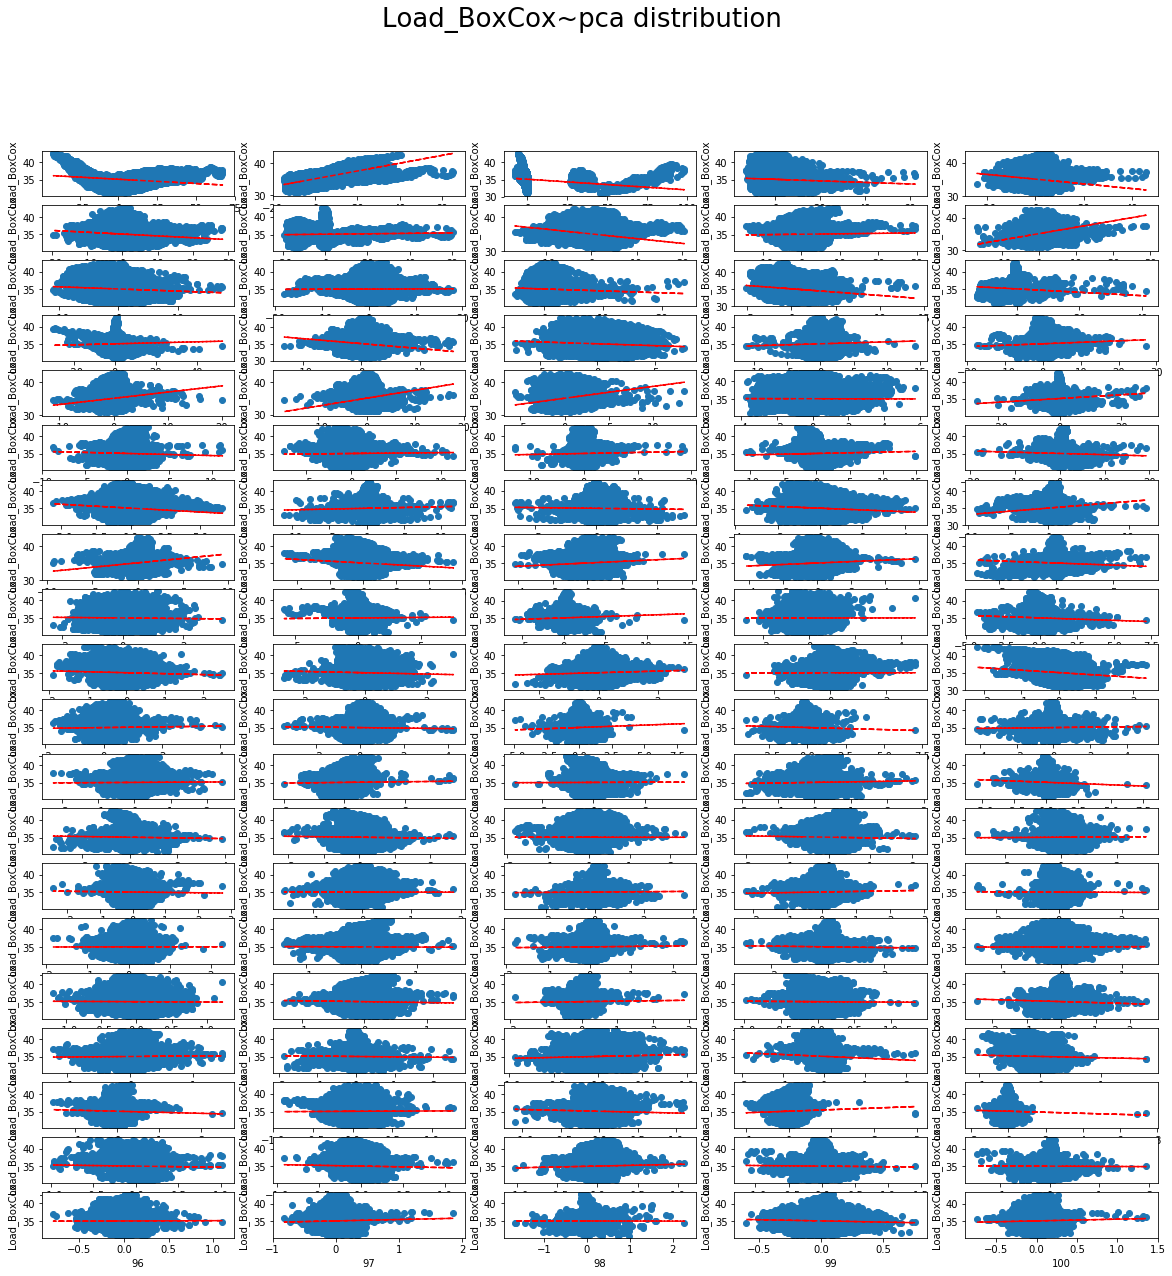

In [124]:
# plot pca verses y for all pca's if desired
fig=plt.figure(figsize=(20,20))
fig.suptitle('Load_BoxCox~pca distribution', fontsize=26)
for i,col in enumerate(df_X_trntst_save.columns):
    z = np.polyfit(df_X_trntst_save[col],data_trntst['Load_BoxCox'],1)
    p = np.poly1d(z)
    ax=fig.add_subplot(20,5,i+1)
    ax.plot(df_X_trntst_save[col],p(df_X_trntst_save[col]),"r--")
    ax.scatter(df_X_trntst_save[col],data_trntst['Load_BoxCox'])
    ax.set_xlabel(col+1)
    ax.set_ylabel('Load_BoxCox')
    
plt.show()

<BarContainer object of 100 artists>

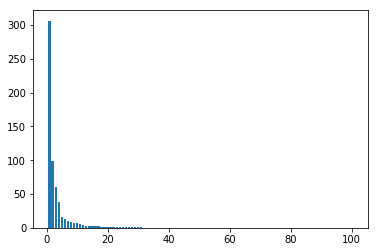

In [125]:
plt.bar(x=range(1, pca.n_components_+1),height=pca.explained_variance_)

In [137]:
X_trntst_save = data_trntst.drop(columns = 'Load_BoxCox').values
Y_trntst_save = data_trntst['Load_BoxCox'].values

In [161]:
# run PCA if desired
from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
pca = PCA(10)

pca.fit(X_trntst_save)
print(pca.n_components_)

X_trntst_save = pca.transform(X_trntst_save)

10


In [162]:
X_trntst_save.shape

(35016, 10)

In [163]:
X_trntst = X_trntst_save
Y_trntst = Y_trntst_save

In [164]:
X_trntst.shape

(35016, 10)

In [165]:
X_trntst

array([[34.78582605, 25.04923945, -3.32552776, ...,  2.93368485,
         4.58122147, -2.07358982],
       [35.65287605, 25.71556712, -3.39318513, ...,  3.48565453,
         4.90222898, -2.51844114],
       [36.39112071, 26.28527873, -3.45563545, ...,  4.11348298,
         5.21541635, -2.63651513],
       ...,
       [10.72751894, -6.89081481, -0.34419973, ..., -2.60805797,
        -0.48615404,  1.58969924],
       [11.03598242, -6.66925021, -0.36687976, ..., -2.48652689,
        -0.57012678,  1.20989112],
       [11.67912222, -6.23045772, -0.41274761, ..., -1.70089206,
        -0.88339238,  0.63504425]])

In [166]:
nstop = 10
rsq_trn = pd.DataFrame(np.zeros((nstop, 4)), columns =['LR','NN','GB','RF'])
rsq_tst = pd.DataFrame(np.zeros((nstop, 4)), columns =['LR','NN','GB','RF'])
rsq_validate = pd.DataFrame(np.zeros((1, 4)), columns =['LR','NN','GB','RF'])

In [167]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

for n in range(nstop):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .2)
    X_trn_save = X_trn.copy()
    X_tst_save = X_tst.copy()
    Y_trn_save = Y_trn.copy()
    Y_tst_save = Y_tst.copy()
 

# Linear regression
    LR = LinearRegression(copy_X=True).fit(X_trn,Y_trn) #copy_X : boolean, optional, default True. If True, X will be copied; else, it may be overwritten.
    predict_LR_trn = LR.predict(X_trn)
    predict_LR_tst = LR.predict(X_tst)
    rsq_trn.loc[n,'LR'] = mean_absolute_percentage_error(Y_trn,predict_LR_trn)
    rsq_tst.loc[n,'LR'] = mean_absolute_percentage_error(Y_tst,predict_LR_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_tst = Y_tst_save
    

# Neural net   
    NN = MLPRegressor(hidden_layer_sizes=(8,2),activation='tanh',solver='adam',
                      learning_rate='adaptive',max_iter=10000,learning_rate_init=.01,alpha=.01)
    NN.fit(X_trn,Y_trn)
    predict_NN_trn = NN.predict(X_trn)
    predict_NN_tst = NN.predict(X_tst)
    rsq_trn.loc[n,'NN'] = mean_absolute_percentage_error(Y_trn,predict_NN_trn)
    rsq_tst.loc[n,'NN'] = mean_absolute_percentage_error(Y_tst,predict_NN_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_trn = Y_trn_save
    

# Gradient boosting tree    
    params = {'n_estimators':300, 'max_depth':4, 'min_samples_split':20, 'learning_rate':.2, 
              'loss':'ls'}
    GB = GradientBoostingRegressor(**params)
    GB.fit(X_trn,Y_trn)
    predict_GB_trn = GB.predict(X_trn)
    predict_GB_tst = GB.predict(X_tst)
    rsq_trn.loc[n,'GB'] = mean_absolute_percentage_error(Y_trn,predict_GB_trn)
    rsq_tst.loc[n,'GB'] = mean_absolute_percentage_error(Y_tst,predict_GB_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_tst = Y_tst_save
   

# Random forest
    RF = RandomForestRegressor(n_estimators=15, max_depth=20)    
    RF.fit(X_trn,Y_trn)
    predict_RF_trn = RF.predict(X_trn)
    predict_RF_tst = RF.predict(X_tst)
    rsq_trn.loc[n,'RF'] = mean_absolute_percentage_error(Y_trn,predict_RF_trn)
    rsq_tst.loc[n,'RF'] = mean_absolute_percentage_error(Y_tst,predict_RF_tst)
    
    print('loop', n)
    print("training: ",rsq_trn.loc[n,'LR'],rsq_trn.loc[n,'NN'],rsq_trn.loc[n,'GB'],rsq_trn.loc[n,'RF'])
    print("testing: ",rsq_tst.loc[n,'LR'],rsq_tst.loc[n,'NN'],rsq_tst.loc[n,'GB'],rsq_tst.loc[n,'RF'])

loop 0
training:  0.0225567815316321 0.013001791926448692 0.012087319297823506 0.005965336724309786
testing:  0.02229070323538009 0.012808631090029806 0.014086829704319856 0.013875756613915881
loop 1
training:  0.022511740610834448 0.015296212027120544 0.012037626760193047 0.005927851529248502
testing:  0.022473776099091333 0.01497040285715382 0.013883514069822725 0.013895553356213949
loop 2
training:  0.02252227671603898 0.0162260278173438 0.011905760520865059 0.00598411024386158
testing:  0.022385880759821404 0.016213488219178427 0.014020697846608768 0.01424845943821431
loop 3
training:  0.022566099541966814 0.015045038268197362 0.012084579619959939 0.006006105588563528
testing:  0.022326910879519952 0.01518019534276752 0.014113348460944123 0.014127348204250583
loop 4
training:  0.022550962356765833 0.015380589753798054 0.012039520706754143 0.005986363610363375
testing:  0.022362903580695467 0.015238900313349355 0.013867382142627123 0.014012943126349051
loop 5
training:  0.0224157252

In [168]:
rsq_tst

,LR,NN,GB,RF
0,0.022291,0.012809,0.014087,0.013876
1,0.022474,0.014970,0.013884,0.013896
2,0.022386,0.016213,0.014021,0.014248
3,0.022327,0.015180,0.014113,0.014127
4,0.022363,0.015239,0.013867,0.014013
5,0.022875,0.014296,0.014291,0.014347
6,0.022391,0.015858,0.014114,0.014036
7,0.022496,0.015012,0.014071,0.014092
8,0.022534,0.013251,0.014237,0.014194
9,0.022655,0.014200,0.014173,0.014133


In [169]:
print('LR:', rsq_trn['LR'].mean(), rsq_tst['LR'].mean())
print('NN:', rsq_trn['NN'].mean(), rsq_tst['NN'].mean())
print('GB:', rsq_trn['GB'].mean(), rsq_tst['GB'].mean())
print('RF:', rsq_trn['RF'].mean(), rsq_tst['RF'].mean())

LR: 0.022517920072243267 0.02247911636879004
NN: 0.014793375437872408 0.01470288343639713
GB: 0.012014483760193012 0.01408585432657045
RF: 0.005983425935442631 0.014096190612154008


In [198]:
X_train_set = X_trntst.iloc[:26256,:]

In [200]:
Y_trntst.shape

(35016,)

In [203]:
X_trntst = pd.DataFrame(X_trntst)
Y_trntst = data_trntst['Load_BoxCox']

X_train_set = X_trntst.iloc[:26256,:]
X_test_set = X_trntst.iloc[26257:,:]
Y_train_set = Y_trntst.iloc[:26256]
Y_test_set = Y_trntst.iloc[26257:]

In [204]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [205]:
nstop = 1
rsq_trn = pd.DataFrame(np.zeros((nstop, 4)), columns =['LR','NN','GB','RF'])
rsq_tst = pd.DataFrame(np.zeros((nstop, 4)), columns =['LR','NN','GB','RF'])
rsq_validate = pd.DataFrame(np.zeros((1, 4)), columns =['LR','NN','GB','RF'])

In [206]:
# Linear regression
LR = LinearRegression(copy_X=True).fit(X_train_set,Y_train_set) #copy_X : boolean, optional, default True. If True, X will be copied; else, it may be overwritten.
predict_LR_trn = LR.predict(X_train_set)
predict_LR_tst = LR.predict(X_test_set)
rsq_trn.loc[n,'LR'] = mean_absolute_percentage_error(Y_train_set,predict_LR_trn)
rsq_tst.loc[n,'LR'] = mean_absolute_percentage_error(Y_test_set,predict_LR_tst)

# Neural net   
NN = MLPRegressor(hidden_layer_sizes=(8,2),activation='tanh',solver='adam',
                      learning_rate='adaptive',max_iter=10000,learning_rate_init=.01,alpha=.01)
NN.fit(X_train_set,Y_train_set)
predict_NN_trn = NN.predict(X_train_set)
predict_NN_tst = NN.predict(X_test_set)
rsq_trn.loc[n,'NN'] = mean_absolute_percentage_error(Y_train_set,predict_NN_trn)
rsq_tst.loc[n,'NN'] = mean_absolute_percentage_error(Y_test_set,predict_NN_tst)

# Gradient boosting tree    
params = {'n_estimators':300, 'max_depth':4, 'min_samples_split':20, 'learning_rate':.2, 
          'loss':'ls'}
GB = GradientBoostingRegressor(**params)
GB.fit(X_train_set,Y_train_set)
predict_GB_trn = GB.predict(X_train_set)
predict_GB_tst = GB.predict(X_test_set)
rsq_trn.loc[n,'GB'] = mean_absolute_percentage_error(Y_train_set,predict_GB_trn)
rsq_tst.loc[n,'GB'] = mean_absolute_percentage_error(Y_test_set,predict_GB_tst)

# Random forest
RF = RandomForestRegressor(n_estimators=15, max_depth=20)    
RF.fit(X_train_set,Y_train_set)
predict_RF_trn = RF.predict(X_train_set)
predict_RF_tst = RF.predict(X_test_set)
rsq_trn.loc[n,'RF'] = mean_absolute_percentage_error(Y_train_set,predict_RF_trn)
rsq_tst.loc[n,'RF'] = mean_absolute_percentage_error(Y_test_set,predict_RF_tst)
    
print("training: ",rsq_trn.loc[n,'LR'],rsq_trn.loc[n,'NN'],rsq_trn.loc[n,'GB'],rsq_trn.loc[n,'RF'])
print("testing: ",rsq_tst.loc[n,'LR'],rsq_tst.loc[n,'NN'],rsq_tst.loc[n,'GB'],rsq_tst.loc[n,'RF'])

training:  0.022619548133652887 0.01250510981609639 0.011835546051255356 0.005865546382678744
testing:  0.022276691479144576 0.012998901498947628 0.014920661502441736 0.016128939641896926
